# Testing notebooks

In [1]:
msg = "Welcome to Jupyter notebooks"
print(msg)

Welcome to Jupyter notebooks


In [7]:
import gspread
import pandas as pd


# Ruta al archivo JSON de credenciales
cred_file = "/home/mikel/mikelinv-1fa650952440.json"

In [2]:
# Autenticación con Google Sheets
gc = gspread.service_account(filename=cred_file)

# Abrir el documento de Google Sheets por nombre
spreadsheet = gc.open("Tracker")

In [9]:
# Seleccionar la pestaña (tab) por nombre
worksheet = spreadsheet.worksheet("Master")

# Obtener todos los valores de la hoja
data = worksheet.get_all_records()

# Convertir a DataFrame de Pandas
df_raw = pd.DataFrame(data)
df_raw = df_raw.astype(str)
print(df_raw.head())

           Code                      Name  Status      Price Shares   Value  \
0       ing_nar        Cuenta Naranja ING  Activo  €9,300.00      1  €9,300   
1           ing               Cuentas ING  Activo  €2,200.00      1  €2,200   
2        renta4             Cuenta Renta4  Activo  €3,100.00      1  €3,100   
3    myInvestor         Cuenta MyInvestor  Activo  €2,400.00      1  €2,400   
4  FR0000447823  AXA TRESOR COURT TERME C   Watch  €2,590.35      0      €0   

  Currency portfolio Type1  Type2 Advanced Index  ...          Isin Maturity  \
0                      Dep  Vista                 ...                          
1                      Dep  Vista                 ...                          
2                      Dep  Vista                 ...                          
3                      Dep  Vista                 ...                          
4                      Mon    Mon                 ...  FR0000447823            

  Coupon payment Comision Spain Europe US EM

In [10]:
df_raw.to_parquet("/home/mikel/devproject/data/raw/" + "tracker_master.parquet")
# df = pd.read_parquet("data.parquet", engine="pyarrow")

In [ ]:
df = df_raw.copy()
df = df.astype(str)
df["Price"] = df["Price"].str.replace(r"[€,]", "", regex=True)
# df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# df.info()

In [ ]:
df = pd.read_parquet("/home/mikel/devproject/data/raw/" + "tracker_master_raw.parquet")

for col in ["Price", "Shares", "Value", "Expected Yield","Risk","Comision","Spain","Europe","US","EM","Int","Delta index"]:
    df[col] = df[col].str.replace(r"[€,%]", "", regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in ["Expected Yield","Spain","Europe","US","EM","Int"]:
    df[col] = df[col].fillna(0)

df.to_parquet("/home/mikel/devproject/data/processed/" + "tracker_master_processed.parquet")

  Type1  Value_pct
0   Alt   0.021459
1  Comm   0.105772
3   Dep   0.009727
5   Inm   0.072465
6   Mon   0.233066
7    RF   0.210766
8    RV   0.346745


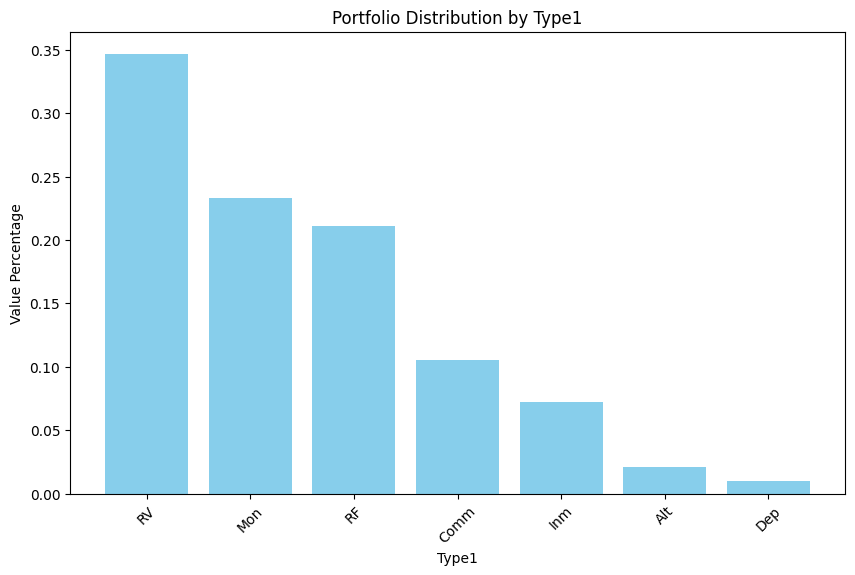

In [ ]:
df = pd.read_parquet("/home/mikel/devproject/data/processed/" + "tracker_master_processed.parquet")

portfolio_type1 = df.groupby('Type1')['Value'].sum() / df['Value'].sum()
portfolio_type1 = portfolio_type1.reset_index()
portfolio_type1.columns = ['Type1', 'Value_pct']
portfolio_type1 = portfolio_type1[~portfolio_type1['Type1'].isin(['Curr', 'Index'])]
print(portfolio_type1)
import matplotlib.pyplot as plt

# Sort the dataframe by Value_pct
portfolio_type1 = portfolio_type1.sort_values(by='Value_pct', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(portfolio_type1['Type1'], portfolio_type1['Value_pct'], color='skyblue')
plt.xlabel('Type1')
plt.ylabel('Value Percentage')
plt.title('Portfolio Distribution by Type1')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from loguru import logger
logger.add("/home/mikel/devproject/logs/execl.log", rotation="10 MB")  # Rota el archivo cada 10 MB

logger.debug("Este es un mensaje de depuración")
logger.info("Este es un mensaje informativo")
logger.warning("Este es un mensaje de advertencia")
logger.error("Este es un mensaje de error")
logger.critical("Este es un mensaje crítico")